In [5]:
pip install -q kaggle

In [6]:
from google.colab import files



In [7]:
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"poornimaguddettu","key":"9dad5daa1ba641066667349e0e6fe825"}'}

In [8]:
! mkdir ~/.kaggle



In [9]:
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets list

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned     Students Performance | Clean Dataset                10KB  2024-10-29 19:32:26           6508        128  1.0              
positivealexey/youtube-channel-performance-analytics         YouTube Channel Performance Analytics               40KB  2024-10-25 10:06:26           1644         27  1.0              
steve1215rogg/student-lifestyle-dataset                      student lifestyle dataset                           22KB  2024-11-11 19:11:28           2944         46  1.0              
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage

In [10]:
!kaggle competitions download -c telecom-churn-case-study-hackathon-c-65

 27% 5.00M/18.8M [00:00<00:00, 48.8MB/s]
100% 18.8M/18.8M [00:00<00:00, 112MB/s] 


In [11]:
! mkdir telecom_churn_casestudy_c65
! unzip telecom-churn-case-study-hackathon-c-65.zip -d telecom_churn_casestudy_c65

Archive:  telecom-churn-case-study-hackathon-c-65.zip
  inflating: telecom_churn_casestudy_c65/data_dictionary.csv  
  inflating: telecom_churn_casestudy_c65/sample.csv  
  inflating: telecom_churn_casestudy_c65/starter-notebook - Labs 1.ipynb  
  inflating: telecom_churn_casestudy_c65/test.csv  
  inflating: telecom_churn_casestudy_c65/train.csv  


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [27]:
og_data= pd.read_csv('telecom_churn_casestudy_c65/train.csv')

In [28]:
og_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [15]:
og_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [16]:
og_data.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
max    11166.21000           1.000000  

[8 rows x 163 columns]

In [17]:
og_data['num']

KeyError: 'num'

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(og_data.describe())

                 id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   


In [19]:
#Few columns have same values - loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6  ,std_og_t2c_mou_7  ,std_og_t2c_mou_8  ,std_ic_t2o_mou_6  ,
# std_ic_t2o_mou_7  ,std_ic_t2o_mou_8

In [29]:
og_data.shape

(69999, 172)

In [30]:
#Finding more about the data so that we can decide on the variables to assess
def metadata_matrix(data) :
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str),
                'Non_Null_Count': data.count(axis = 0).astype(int),
                'Null_Count': data.isnull().sum().astype(int),
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2),
                'Unique_Values_Count': data.nunique().astype(int)
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(og_data)


Datatype  Non_Null_Count  Null_Count  \
arpu_3g_6                 float64           17568       52431   
count_rech_2g_6           float64           17568       52431   
night_pck_user_6          float64           17568       52431   
arpu_2g_6                 float64           17568       52431   
date_of_last_rech_data_6   object           17568       52431   
total_rech_data_6         float64           17568       52431   
av_rech_amt_data_6        float64           17568       52431   
max_rech_data_6           float64           17568       52431   
count_rech_3g_6           float64           17568       52431   
fb_user_6                 float64           17568       52431   
night_pck_user_7          float64           17865       52134   
date_of_last_rech_data_7   object           17865       52134   
total_rech_data_7         float64           17865       52134   
max_rech_data_7           float64           17865       52134   
fb_user_7                 float64           17865       52134   
count_rech_2g_7           float64           17865       52134   
count_rech_3g_7           float64           17865       52134   
arpu_3g_7                 float64           17865       52134   
av_rech_amt_data_7        float64           17865       52134   
arpu_2g_7                 float64           17865       52134   
count_rech_2g_8           float64           18417       51582   
av_rech_amt_data_8        float64           18417       51582   
night_pck_user_8          float64           18417       51582   
max_rech_data_8           float64           18417       51582   
total_rech_data_8         float64           18417       51582   
arpu_2g_8                 float64           18417       51582   
arpu_3g_8                 float64           18417       51582   
date_of_last_rech_data_8   object           18417       51582   
fb_user_8                 float64           18417       51582   
count_rech_3g_8           float64           18417       51582   
isd_og_mou_8              float64           66296        3703   
std_ic_t2o_mou_8          float64           66296        3703   
std_og_t2c_mou_8          float64           66296        3703   
std_ic_t2f_mou_8          float64           66296        3703   
std_og_mou_8              float64           66296        3703   
std_ic_t2m_mou_8          float64           66296        3703   
std_ic_mou_8              float64           66296        3703   
std_ic_t2t_mou_8          float64           66296        3703   
og_others_8               float64           66296        3703   
spl_og_mou_8              float64           66296        3703   
loc_ic_t2m_mou_8          float64           66296        3703   
loc_ic_mou_8              float64           66296        3703   
loc_ic_t2f_mou_8          float64           66296        3703   
std_og_t2f_mou_8          float64           66296        3703   
loc_og_t2c_mou_8          float64           66296        3703   
ic_others_8               float64           66296        3703   
loc_og_mou_8              float64           66296        3703   
onnet_mou_8               float64           66296        3703   
offnet_mou_8              float64           66296        3703   
roam_ic_mou_8             float64           66296        3703   
roam_og_mou_8             float64           66296        3703   
loc_og_t2t_mou_8          float64           66296        3703   
loc_og_t2m_mou_8          float64           66296        3703   
loc_og_t2f_mou_8          float64           66296        3703   
std_og_t2m_mou_8          float64           66296        3703   
loc_ic_t2t_mou_8          float64           66296        3703   
isd_ic_mou_8              float64           66296        3703   
std_og_t2t_mou_8          float64           66296        3703   
spl_ic_mou_8              float64           66296        3703   
std_ic_t2m_mou_6          float64           67231        2768   
std_ic_t2t_mou_6          float64           67231        276

Churn Probability is our target value
We have to check for categorical values and values that do not provide any input to our model

In [22]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

In [31]:
metadata_matrix(og_data)

Datatype  Non_Null_Count  Null_Count  \
arpu_3g_6                 float64           17568       52431   
count_rech_2g_6           float64           17568       52431   
night_pck_user_6          float64           17568       52431   
arpu_2g_6                 float64           17568       52431   
date_of_last_rech_data_6   object           17568       52431   
total_rech_data_6         float64           17568       52431   
av_rech_amt_data_6        float64           17568       52431   
max_rech_data_6           float64           17568       52431   
count_rech_3g_6           float64           17568       52431   
fb_user_6                 float64           17568       52431   
night_pck_user_7          float64           17865       52134   
date_of_last_rech_data_7   object           17865       52134   
total_rech_data_7         float64           17865       52134   
max_rech_data_7           float64           17865       52134   
fb_user_7                 float64           17865       52134   
count_rech_2g_7           float64           17865       52134   
count_rech_3g_7           float64           17865       52134   
arpu_3g_7                 float64           17865       52134   
av_rech_amt_data_7        float64           17865       52134   
arpu_2g_7                 float64           17865       52134   
count_rech_2g_8           float64           18417       51582   
av_rech_amt_data_8        float64           18417       51582   
night_pck_user_8          float64           18417       51582   
max_rech_data_8           float64           18417       51582   
total_rech_data_8         float64           18417       51582   
arpu_2g_8                 float64           18417       51582   
arpu_3g_8                 float64           18417       51582   
date_of_last_rech_data_8   object           18417       51582   
fb_user_8                 float64           18417       51582   
count_rech_3g_8           float64           18417       51582   
isd_og_mou_8              float64           66296        3703   
std_ic_t2o_mou_8          float64           66296        3703   
std_og_t2c_mou_8          float64           66296        3703   
std_ic_t2f_mou_8          float64           66296        3703   
std_og_mou_8              float64           66296        3703   
std_ic_t2m_mou_8          float64           66296        3703   
std_ic_mou_8              float64           66296        3703   
std_ic_t2t_mou_8          float64           66296        3703   
og_others_8               float64           66296        3703   
spl_og_mou_8              float64           66296        3703   
loc_ic_t2m_mou_8          float64           66296        3703   
loc_ic_mou_8              float64           66296        3703   
loc_ic_t2f_mou_8          float64           66296        3703   
std_og_t2f_mou_8          float64           66296        3703   
loc_og_t2c_mou_8          float64           66296        3703   
ic_others_8               float64           66296        3703   
loc_og_mou_8              float64           66296        3703   
onnet_mou_8               float64           66296        3703   
offnet_mou_8              float64           66296        3703   
roam_ic_mou_8             float64           66296        3703   
roam_og_mou_8             float64           66296        3703   
loc_og_t2t_mou_8          float64           66296        3703   
loc_og_t2m_mou_8          float64           66296        3703   
loc_og_t2f_mou_8          float64           66296        3703   
std_og_t2m_mou_8          float64           66296        3703   
loc_ic_t2t_mou_8          float64           66296        3703   
isd_ic_mou_8              float64           66296        3703   
std_og_t2t_mou_8          float64           66296        3703   
spl_ic_mou_8              float64           66296        3703   
std_ic_t2m_mou_6          float64           67231        2768   
std_ic_t2t_mou_6          float64           67231        276

**Cleaning the data**

In [32]:
non_numeric_columns = telecom_data.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')


In [33]:
telecom_data[non_numeric_columns].apply(lambda x: print(x.value_counts()))


last_date_of_month_6
6/30/2014    69999
Name: count, dtype: int64
last_date_of_month_7
7/31/2014    69600
Name: count, dtype: int64
last_date_of_month_8
8/31/2014    69266
Name: count, dtype: int64
date_of_last_rech_6
6/30/2014    11880
6/29/2014     9049
6/27/2014     7800
6/28/2014     6752
6/26/2014     3918
6/25/2014     3402
6/24/2014     2888
6/17/2014     2887
6/14/2014     2686
6/21/2014     2654
6/23/2014     2060
6/18/2014     1886
6/12/2014     1746
6/22/2014     1624
6/13/2014     1468
6/19/2014     1387
6/20/2014     1252
6/16/2014      783
6/15/2014      605
6/11/2014      398
6/8/2014       368
6/5/2014       229
6/7/2014       223
6/10/2014      200
6/3/2014       172
6/1/2014       155
6/9/2014       135
6/6/2014       123
6/4/2014        90
6/2/2014        78
Name: count, dtype: int64
date_of_last_rech_7
7/31/2014    12206
7/30/2014     9716
7/25/2014     6577
7/29/2014     6320
7/28/2014     5370
7/27/2014     4136
7/26/2014     3765
7/24/2014     2750
7/19/2014     

last_date_of_month_6        None
last_date_of_month_7        None
last_date_of_month_8        None
date_of_last_rech_6         None
date_of_last_rech_7         None
date_of_last_rech_8         None
date_of_last_rech_data_6    None
date_of_last_rech_data_7    None
date_of_last_rech_data_8    None
dtype: object

In [34]:
#Few columns has data that we already know - for example last date of a particular month
#Dropping those columns

dropping_columns = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8']
telecom_data = telecom_data.drop(columns=dropping_columns, axis=1)
telecom_data.shape

(69999, 160)

In [35]:
#Since all the mobile networks in this data set belong to the same area, we can drop this column as well
telecom_data= telecom_data.drop('circle_id',axis=1)

In [36]:
telecom_data.shape

(69999, 159)

In [37]:
# Cheking percent of missing values in columns
missing_columns = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

null
arpu_3g_6                 74.90
night_pck_user_6          74.90
total_rech_data_6         74.90
max_rech_data_6           74.90
date_of_last_rech_data_6  74.90
count_rech_2g_6           74.90
av_rech_amt_data_6        74.90
fb_user_6                 74.90
count_rech_3g_6           74.90
arpu_2g_6                 74.90
total_rech_data_7         74.48
fb_user_7                 74.48
count_rech_2g_7           74.48
max_rech_data_7           74.48
count_rech_3g_7           74.48
av_rech_amt_data_7        74.48
arpu_2g_7                 74.48
night_pck_user_7          74.48
date_of_last_rech_data_7  74.48
arpu_3g_7                 74.48
total_rech_data_8         73.69
arpu_2g_8                 73.69
max_rech_data_8           73.69
count_rech_2g_8           73.69
count_rech_3g_8           73.69
av_rech_amt_data_8        73.69
night_pck_user_8          73.69
fb_user_8                 73.69
arpu_3g_8                 73.69
date_of_last_rech_data_8  73.69
og_others_8                5.29
loc_ic_mou_8               5.29
spl_ic_mou_8               5.29
spl_og_mou_8               5.29
std_ic_t2t_mou_8           5.29
isd_og_mou_8               5.29
loc_ic_t2t_mou_8           5.29
loc_ic_t2m_mou_8           5.29
std_og_mou_8               5.29
offnet_mou_8               5.29
std_og_t2m_mou_8           5.29
std_og_t2f_mou_8           5.29
std_ic_t2m_mou_8           5.29
roam_ic_mou_8              5.29
roam_og_mou_8              5.29
isd_ic_mou_8               5.29
loc_og_t2t_mou_8           5.29
loc_og_t2m_mou_8           5.29
std_ic_mou_8               5.29
onnet_mou_8                5.29
loc_og_t2f_mou_8           5.29
loc_ic_t2f_mou_8           5.29
loc_og_t2c_mou_8           5.29
std_ic_t2f_mou_8           5.29
loc_og_mou_8               5.29
ic_others_8                5.29
std_og_t2t_mou_8           5.29
std_ic_t2t_mou_6           3.95
loc_ic_mou_6               3.95
std_ic_t2f_mou_6           3.95
spl_ic_mou_6               3.95
ic_others_6                3.95
std_ic_t2m_mou_6           3.95
std_ic_mou_6               3.95
isd_og_mou_6               3.95
loc_ic_t2f_mou_6           3.95
loc_ic_t2m_mou_6           3.95
onnet_mou_6                3.95
offnet_mou_6               3.95
roam_ic_mou_6              3.95
roam_og_mou_6              3.95
loc_og_t2t_mou_6           3.95
loc_og_t2m_mou_6           3.95
loc_og_t2f_mou_6           3.95
loc_og_t2c_mou_6           3.95
loc_og_mou_6               3.95
std_og_t2t_mou_6           3.95
std_og_t2m_mou_6           3.95
std_og_t2f_mou_6           3.95
std_og_mou_6               3.95
spl_og_mou_6               3.95
og_others_6                3.95
loc_ic_t2t_mou_6           3.95
isd_ic_mou_6               3.95
ic_others_7                3.84
isd_ic_mou_7               3.84
loc_ic_mou_7               3.84
spl_ic_mou_7               3.84
loc_og_mou_7               3.84
og_others_7                3.84
spl_og_mou_7               3.84
isd_og_mou_7               3.84
std_og_mou_7               3.84
std_og_t2f_mou_7           3.84
std_og_t2m_mou_7           3.84
std_og_t2t_mou_7           3.84
loc_og_t2c_mou_7           3.84
loc_ic_t2f_mou_7           3.84
loc_og_t2f_mou_7           3.84
loc_og_t2m_mou_7           3.84
loc_og_t2t_mou_7           3.84
roam_og_mou_7              3.84
roam_ic_mou_7              3.84
offnet_mou_7               3.84
onnet_mou_7                3.84
loc_ic_t2m_mou_7           3.84
loc_ic_t2t_mou_7           3.84
std_ic_t2t_mou_7           3.84
std_ic_mou_7               3.84
std_ic_t2f_mou_7           3.84
std_ic_t2m_mou_7           3.84
date_of_last_rech_8        3.52
date_of_last_rech_7        1.76
date_of_last_rech_6        1.57
monthly_3g_6               0.00
jun_vbc_3g                 0.00
jul_vbc_3g                 0.00
sachet_3g_7                0.00
sachet_3g_6                0.00
monthly_3g_8               0.00
monthly_3g_7               0.00
sachet_2g_7                0.00
sachet_2g_8                0.00
sachet_2g_6                0.00
monthly_2g_8               

In [38]:
# List the columns having more than 70% missing values
list_missing_70 = list(missing_columns.index[missing_columns['null'] > 70])
list_missing_70

['arpu_3g_6',
 'night_pck_user_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'av_rech_amt_data_6',
 'fb_user_6',
 'count_rech_3g_6',
 'arpu_2g_6',
 'total_rech_data_7',
 'fb_user_7',
 'count_rech_2g_7',
 'max_rech_data_7',
 'count_rech_3g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'date_of_last_rech_data_7',
 'arpu_3g_7',
 'total_rech_data_8',
 'arpu_2g_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'night_pck_user_8',
 'fb_user_8',
 'arpu_3g_8',
 'date_of_last_rech_data_8']

In [39]:
# Missing values can be imputed with '-1'
# where -1 can be treated as a new category.

categorical_vars = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "fb_user_6", "fb_user_7", "fb_user_8"]

for var in categorical_vars:
    telecom_data[var].fillna(value=-1, inplace=True)

<ipython-input-39-6394d4a0b2a7>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telecom_data[var].fillna(value=-1, inplace=True)


In [40]:
# Create dummy variables for all the six categorial variables
night_pck_user_6_s = pd.get_dummies(telecom_data['night_pck_user_6'],prefix="night6",drop_first=True)
night_pck_user_7_s = pd.get_dummies(telecom_data['night_pck_user_7'],prefix="night7",drop_first=True)
night_pck_user_8_s = pd.get_dummies(telecom_data['night_pck_user_8'],prefix="night8",drop_first=True)

fb_user_6_s = pd.get_dummies(telecom_data['fb_user_6'],prefix="fb6", drop_first=True)
fb_user_7_s = pd.get_dummies(telecom_data['fb_user_7'],prefix="fb7",drop_first=True)
fb_user_8_s = pd.get_dummies(telecom_data['fb_user_8'],prefix="fb8",drop_first=True)

telecom_data = pd.concat([telecom_data,night_pck_user_6_s],axis=1)
telecom_data = pd.concat([telecom_data,night_pck_user_7_s],axis=1)
telecom_data = pd.concat([telecom_data,night_pck_user_8_s],axis=1)

telecom_data = pd.concat([telecom_data,fb_user_6_s],axis=1)
telecom_data = pd.concat([telecom_data,fb_user_7_s],axis=1)
telecom_data = pd.concat([telecom_data,fb_user_8_s],axis=1)

# drop all categorial columns
telecom_data = telecom_data.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], axis=1)

In [41]:
telecom_data.shape

(69999, 165)

In [42]:
# List the columns having more than 70% missing values
list_missing_70 = list(missing_columns.index[missing_columns['null'] > 70])
list_missing_70

['arpu_3g_6',
 'night_pck_user_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'av_rech_amt_data_6',
 'fb_user_6',
 'count_rech_3g_6',
 'arpu_2g_6',
 'total_rech_data_7',
 'fb_user_7',
 'count_rech_2g_7',
 'max_rech_data_7',
 'count_rech_3g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'date_of_last_rech_data_7',
 'arpu_3g_7',
 'total_rech_data_8',
 'arpu_2g_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'night_pck_user_8',
 'fb_user_8',
 'arpu_3g_8',
 'date_of_last_rech_data_8']

In [43]:
# Columns with recharge information
recharge_cols = telecom_data.columns[telecom_data.columns.str.contains('_rech_')]
print(recharge_cols)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8'],
      dtype='object')


In [44]:
telecom_data['total_rech_num_6'].value_counts()

total_rech_num_6
4      8079
3      8001
5      7285
2      6298
6      6216
7      4898
8      4030
1      3523
9      3324
10     2699
11     2254
12     1814
13     1490
14     1218
0      1101
15     1026
16      899
17      734
18      646
19      534
20      456
21      363
22      350
23      325
24      258
25      258
26      196
27      178
28      166
29      132
30      127
31      112
32      104
33       95
36       74
34       74
35       71
37       54
38       47
40       40
42       36
41       35
44       33
45       30
47       27
46       26
39       25
43       23
51       20
49       19
52       17
53       15
48       14
58       10
56        9
50        8
55        8
54        6
59        6
63        6
57        5
61        5
65        5
62        5
66        4
68        3
72        3
69        3
70        3
71        3
76        3
75        2
88        2
94        2
80        2
84        2
125       2
77        2
73        2
60        2
67        2
83        2
64        2
117       1
105       1
102       1
74        1
121       1
87        1
89        1
116       1
90        1
170       1
78        1
Name: count, dtype: int64

In [45]:
# Replacing NaN values in recharge related columns with 0 in the training set
telecom_data[recharge_cols] = telecom_data[recharge_cols].fillna(0)
print(telecom_data[recharge_cols].isnull().sum()*100/telecom_data.shape[1])

total_rech_num_6            0.0
total_rech_num_7            0.0
total_rech_num_8            0.0
total_rech_amt_6            0.0
total_rech_amt_7            0.0
total_rech_amt_8            0.0
max_rech_amt_6              0.0
max_rech_amt_7              0.0
max_rech_amt_8              0.0
date_of_last_rech_6         0.0
date_of_last_rech_7         0.0
date_of_last_rech_8         0.0
date_of_last_rech_data_6    0.0
date_of_last_rech_data_7    0.0
date_of_last_rech_data_8    0.0
total_rech_data_6           0.0
total_rech_data_7           0.0
total_rech_data_8           0.0
max_rech_data_6             0.0
max_rech_data_7             0.0
max_rech_data_8             0.0
count_rech_2g_6             0.0
count_rech_2g_7             0.0
count_rech_2g_8             0.0
count_rech_3g_6             0.0
count_rech_3g_7             0.0
count_rech_3g_8             0.0
av_rech_amt_data_6          0.0
av_rech_amt_data_7          0.0
av_rech_amt_data_8          0.0
dtype: float64


**Do the same for test set**

In [46]:
# Columns with 'arpu' information
arpu_cols = telecom_data.columns[telecom_data.columns.str.contains('arpu_')]
print(arpu_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')


In [47]:
telecom_data['arpu_6'].value_counts()

arpu_6
 0.000      2603
 20.000       72
-5.000        72
 1.000        49
 1.500        38
            ... 
 119.580       1
 393.027       1
 48.879        1
 179.191       1
 168.269       1
Name: count, Length: 61615, dtype: int64

In [48]:
# Replacing NaN values in ARPU related columns with 0 in the training set
telecom_data[arpu_cols] = telecom_data[arpu_cols].fillna(0)
print(telecom_data[arpu_cols].isnull().sum()*100/telecom_data.shape[1])

arpu_6       0.0
arpu_7       0.0
arpu_8       0.0
arpu_3g_6    0.0
arpu_3g_7    0.0
arpu_3g_8    0.0
arpu_2g_6    0.0
arpu_2g_7    0.0
arpu_2g_8    0.0
dtype: float64


**Do the same for test set**

In [49]:
# Generating a list of column names containing dates

date_cols = ['date_of_last_rech_6',
            'date_of_last_rech_7',
            'date_of_last_rech_8',
            'date_of_last_rech_data_6',
            'date_of_last_rech_data_7',
            'date_of_last_rech_data_8',
            ]

numerical_cols = [col for col in telecom_data.columns if col not in date_cols]

In [50]:
telecom_data[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date_of_last_rech_6       69999 non-null  object
 1   date_of_last_rech_7       69999 non-null  object
 2   date_of_last_rech_8       69999 non-null  object
 3   date_of_last_rech_data_6  69999 non-null  object
 4   date_of_last_rech_data_7  69999 non-null  object
 5   date_of_last_rech_data_8  69999 non-null  object
dtypes: object(6)
memory usage: 3.2+ MB


In [51]:
#Adding up the missing values (column-wise)
telecom_data.isnull().sum()

id                             0
arpu_6                         0
arpu_7                         0
arpu_8                         0
onnet_mou_6                 2768
onnet_mou_7                 2687
onnet_mou_8                 3703
offnet_mou_6                2768
offnet_mou_7                2687
offnet_mou_8                3703
roam_ic_mou_6               2768
roam_ic_mou_7               2687
roam_ic_mou_8               3703
roam_og_mou_6               2768
roam_og_mou_7               2687
roam_og_mou_8               3703
loc_og_t2t_mou_6            2768
loc_og_t2t_mou_7            2687
loc_og_t2t_mou_8            3703
loc_og_t2m_mou_6            2768
loc_og_t2m_mou_7            2687
loc_og_t2m_mou_8            3703
loc_og_t2f_mou_6            2768
loc_og_t2f_mou_7            2687
loc_og_t2f_mou_8            3703
loc_og_t2c_mou_6            2768
loc_og_t2c_mou_7            2687
loc_og_t2c_mou_8            3703
loc_og_mou_6                2768
loc_og_mou_7                2687
loc_og_mou_8                3703
std_og_t2t_mou_6            2768
std_og_t2t_mou_7            2687
std_og_t2t_mou_8            3703
std_og_t2m_mou_6            2768
std_og_t2m_mou_7            2687
std_og_t2m_mou_8            3703
std_og_t2f_mou_6            2768
std_og_t2f_mou_7            2687
std_og_t2f_mou_8            3703
std_og_mou_6                2768
std_og_mou_7                2687
std_og_mou_8                3703
isd_og_mou_6                2768
isd_og_mou_7                2687
isd_og_mou_8                3703
spl_og_mou_6                2768
spl_og_mou_7                2687
spl_og_mou_8                3703
og_others_6                 2768
og_others_7                 2687
og_others_8                 3703
total_og_mou_6                 0
total_og_mou_7                 0
total_og_mou_8                 0
loc_ic_t2t_mou_6            2768
loc_ic_t2t_mou_7            2687
loc_ic_t2t_mou_8            3703
loc_ic_t2m_mou_6            2768
loc_ic_t2m_mou_7            2687
loc_ic_t2m_mou_8            3703
loc_ic_t2f_mou_6            2768
loc_ic_t2f_mou_7            2687
loc_ic_t2f_mou_8            3703
loc_ic_mou_6                2768
loc_ic_mou_7                2687
loc_ic_mou_8                3703
std_ic_t2t_mou_6            2768
std_ic_t2t_mou_7            2687
std_ic_t2t_mou_8            3703
std_ic_t2m_mou_6            2768
std_ic_t2m_mou_7            2687
std_ic_t2m_mou_8            3703
std_ic_t2f_mou_6            2768
std_ic_t2f_mou_7            2687
std_ic_t2f_mou_8            3703
std_ic_mou_6                2768
std_ic_mou_7                2687
std_ic_mou_8                3703
total_ic_mou_6                 0
total_ic_mou_7                 0
total_ic_mou_8                 0
spl_ic_mou_6                2768
spl_ic_mou_7                2687
spl_ic_mou_8                3703
isd_ic_mou_6                2768
isd_ic_mou_7                2687
isd_ic_mou_8                3703
ic_others_6                 2768
ic_others_7                 2687
ic_others_8                 3703
total_rech_num_6               0
total_rech_num_7               0
total_rech_num_8               0
total_rech_amt_6               0
total_rech_amt_7               0
total_rech_amt_8               0
max_rech_amt_6                 0
max_rech_amt_7                 0
max_rech_amt_8                 0
date_of_last_rech_6            0
date_of_last_rech_7            0
date_of_last_rech_8            0
last_day_rch_amt_6             0
last_day_rch_amt_7             0
last_day_rch_amt_8             0
date_of_last_rech_data_6       0
date_of_last_rech_data_7       0
date_of_last_rech_data_8       0
total_rech_data_6              0
total_rech_data_7              0
total_rech_data_8              0
max_rech_data_6                0
max_rech_data_7                0
max_rech_data_8                0
count_rech_2g_6                0
count_rech_2g_7                0
count_rech_2g_8                0
count_rech_3g_6                0
count_rech_3g_7                0
count_rech_3g_8                0
av_rech

In [52]:
missing_value_cols = ['onnet_mou_6','loc_ic_mou_7','spl_ic_mou_6','isd_ic_mou_6','ic_others_6','std_ic_mou_7','std_ic_t2m_mou_7','std_og_t2m_mou_6','loc_og_mou_6']

telecom_data[missing_value_cols].apply(lambda x: print(x.value_counts()))




onnet_mou_6
0.00       6201
0.33         62
0.31         53
0.26         52
1.01         48
           ... 
1156.03       1
793.06        1
1445.18       1
1363.36       1
116.54        1
Name: count, Length: 20057, dtype: int64
loc_ic_mou_7
0.00       3261
0.76         27
0.56         26
0.38         19
0.25         19
           ... 
185.01        1
392.64        1
316.49        1
1085.28       1
334.09        1
Name: count, Length: 24258, dtype: int64
spl_ic_mou_6
0.00     52609
0.15      1153
0.18       673
0.06       634
0.13       628
0.20       540
0.28       518
0.05       502
0.30       483
0.08       461
0.21       423
0.11       408
0.36       398
0.10       387
0.26       374
0.23       341
0.43       323
0.33       291
0.45       278
0.16       275
0.31       273
0.38       259
0.03       244
0.25       235
0.34       230
0.41       224
0.19       213
0.58       201
0.29       194
0.46       194
0.39       188
0.40       188
0.56       187
0.24       186
0.14       177
0.5

onnet_mou_6         None
loc_ic_mou_7        None
spl_ic_mou_6        None
isd_ic_mou_6        None
ic_others_6         None
std_ic_mou_7        None
std_ic_t2m_mou_7    None
std_og_t2m_mou_6    None
loc_og_mou_6        None
dtype: object

In [53]:
#all the above columns be imputed with 0 if value is not present
telecom_data[missing_value_cols] = telecom_data[missing_value_cols].fillna(0)

In [54]:
null_columns = telecom_data.columns[telecom_data.isnull().any()].tolist()
telecom_data[null_columns].apply(lambda x: print(x.value_counts()))

onnet_mou_7
0.00       6440
1.01         61
0.18         51
0.48         51
0.03         49
           ... 
1057.16       1
258.04        1
310.38        1
235.18        1
283.63        1
Name: count, Length: 20076, dtype: int64
onnet_mou_8
0.00      6631
0.41        60
0.38        60
0.48        56
0.36        55
          ... 
324.14       1
247.39       1
796.03       1
166.64       1
232.63       1
Name: count, Length: 19725, dtype: int64
offnet_mou_6
0.00       2570
1.01         32
0.01         30
0.58         25
0.63         24
           ... 
134.03        1
317.68        1
368.33        1
1586.21       1
575.46        1
Name: count, Length: 26254, dtype: int64
offnet_mou_7
0.00       2647
0.53         24
0.33         24
0.28         24
0.13         23
           ... 
242.74        1
1540.93       1
135.38        1
1165.94       1
236.61        1
Name: count, Length: 26139, dtype: int64
offnet_mou_8
0.00      2961
0.03        31
1.01        28
0.21        26
0.18        25
     

onnet_mou_7         None
onnet_mou_8         None
offnet_mou_6        None
offnet_mou_7        None
offnet_mou_8        None
roam_ic_mou_6       None
roam_ic_mou_7       None
roam_ic_mou_8       None
roam_og_mou_6       None
roam_og_mou_7       None
roam_og_mou_8       None
loc_og_t2t_mou_6    None
loc_og_t2t_mou_7    None
loc_og_t2t_mou_8    None
loc_og_t2m_mou_6    None
loc_og_t2m_mou_7    None
loc_og_t2m_mou_8    None
loc_og_t2f_mou_6    None
loc_og_t2f_mou_7    None
loc_og_t2f_mou_8    None
loc_og_t2c_mou_6    None
loc_og_t2c_mou_7    None
loc_og_t2c_mou_8    None
loc_og_mou_7        None
loc_og_mou_8        None
std_og_t2t_mou_6    None
std_og_t2t_mou_7    None
std_og_t2t_mou_8    None
std_og_t2m_mou_7    None
std_og_t2m_mou_8    None
std_og_t2f_mou_6    None
std_og_t2f_mou_7    None
std_og_t2f_mou_8    None
std_og_mou_6        None
std_og_mou_7        None
std_og_mou_8        None
isd_og_mou_6        None
isd_og_mou_7        None
isd_og_mou_8        None
spl_og_mou_6        None
spl_og_mou_7        None
spl_og_mou_8        None
og_others_6         None
og_others_7         None
og_others_8         None
loc_ic_t2t_mou_6    None
loc_ic_t2t_mou_7    None
loc_ic_t2t_mou_8    None
loc_ic_t2m_mou_6    None
loc_ic_t2m_mou_7    None
loc_ic_t2m_mou_8    None
loc_ic_t2f_mou_6    None
loc_ic_t2f_mou_7    None
loc_ic_t2f_mou_8    None
loc_ic_mou_6        None
loc_ic_mou_8        None
std_ic_t2t_mou_6    None
std_ic_t2t_mou_7    None
std_ic_t2t_mou_8    None
std_ic_t2m_mou_6    None
std_ic_t2m_mou_8    None
std_ic_t2f_mou_6    None
std_ic_t2f_mou_7    None
std_ic_t2f_mou_8    None
std_ic_mou_6        None
std_ic_mou_8        None
spl_ic_mou_7        None
spl_ic_mou_8        None
isd_ic_mou_7        None
isd_ic_mou_8        None
ic_others_7         None
ic_others_8         None
dtype: object

In [55]:
null_columns

['onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_i

In [56]:
#we can also impute all the above columns to 0 if value is nan
telecom_data[null_columns] = telecom_data[null_columns].fillna(0)

In [57]:
telecom_data.isnull().sum()

id                          0
arpu_6                      0
arpu_7                      0
arpu_8                      0
onnet_mou_6                 0
onnet_mou_7                 0
onnet_mou_8                 0
offnet_mou_6                0
offnet_mou_7                0
offnet_mou_8                0
roam_ic_mou_6               0
roam_ic_mou_7               0
roam_ic_mou_8               0
roam_og_mou_6               0
roam_og_mou_7               0
roam_og_mou_8               0
loc_og_t2t_mou_6            0
loc_og_t2t_mou_7            0
loc_og_t2t_mou_8            0
loc_og_t2m_mou_6            0
loc_og_t2m_mou_7            0
loc_og_t2m_mou_8            0
loc_og_t2f_mou_6            0
loc_og_t2f_mou_7            0
loc_og_t2f_mou_8            0
loc_og_t2c_mou_6            0
loc_og_t2c_mou_7            0
loc_og_t2c_mou_8            0
loc_og_mou_6                0
loc_og_mou_7                0
loc_og_mou_8                0
std_og_t2t_mou_6            0
std_og_t2t_mou_7            0
std_og_t2t_mou_8            0
std_og_t2m_mou_6            0
std_og_t2m_mou_7            0
std_og_t2m_mou_8            0
std_og_t2f_mou_6            0
std_og_t2f_mou_7            0
std_og_t2f_mou_8            0
std_og_mou_6                0
std_og_mou_7                0
std_og_mou_8                0
isd_og_mou_6                0
isd_og_mou_7                0
isd_og_mou_8                0
spl_og_mou_6                0
spl_og_mou_7                0
spl_og_mou_8                0
og_others_6                 0
og_others_7                 0
og_others_8                 0
total_og_mou_6              0
total_og_mou_7              0
total_og_mou_8              0
loc_ic_t2t_mou_6            0
loc_ic_t2t_mou_7            0
loc_ic_t2t_mou_8            0
loc_ic_t2m_mou_6            0
loc_ic_t2m_mou_7            0
loc_ic_t2m_mou_8            0
loc_ic_t2f_mou_6            0
loc_ic_t2f_mou_7            0
loc_ic_t2f_mou_8            0
loc_ic_mou_6                0
loc_ic_mou_7                0
loc_ic_mou_8                0
std_ic_t2t_mou_6            0
std_ic_t2t_mou_7            0
std_ic_t2t_mou_8            0
std_ic_t2m_mou_6            0
std_ic_t2m_mou_7            0
std_ic_t2m_mou_8            0
std_ic_t2f_mou_6            0
std_ic_t2f_mou_7            0
std_ic_t2f_mou_8            0
std_ic_mou_6                0
std_ic_mou_7                0
std_ic_mou_8                0
total_ic_mou_6              0
total_ic_mou_7              0
total_ic_mou_8              0
spl_ic_mou_6                0
spl_ic_mou_7                0
spl_ic_mou_8                0
isd_ic_mou_6                0
isd_ic_mou_7                0
isd_ic_mou_8                0
ic_others_6                 0
ic_others_7                 0
ic_others_8                 0
total_rech_num_6            0
total_rech_num_7            0
total_rech_num_8            0
total_rech_amt_6            0
total_rech_amt_7            0
total_rech_amt_8            0
max_rech_amt_6              0
max_rech_amt_7              0
max_rech_amt_8              0
date_of_last_rech_6         0
date_of_last_rech_7         0
date_of_last_rech_8         0
last_day_rch_amt_6          0
last_day_rch_amt_7          0
last_day_rch_amt_8          0
date_of_last_rech_data_6    0
date_of_last_rech_data_7    0
date_of_last_rech_data_8    0
total_rech_data_6           0
total_rech_data_7           0
total_rech_data_8           0
max_rech_data_6             0
max_rech_data_7             0
max_rech_data_8             0
count_rech_2g_6             0
count_rech_2g_7             0
count_rech_2g_8             0
count_rech_3g_6             0
count_rech_3g_7             0
count_rech_3g_8             0
av_rech_amt_data_6          0
av_rech_amt_data_7          0
av_rech_amt_data_8          0
vol_2g_mb_6                 0
vol_2g_mb_7                 0
vol_2g_mb_8                 0
vol_3g_mb_6                 0
vol_3g_mb_7                 0
vol_3g_mb_8                 0
arpu_3g_6                   0
arpu_3g_7                   0
arpu_3g_8                   0
arpu_2g_6 

In [58]:
#checking for uniq key id
telecom_data['id'].nunique()

69999

In [59]:
# Columns with date information
date_cols = telecom_data.columns[telecom_data.columns.str.contains('date')]
print(date_cols)

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')


In [60]:

# Check how many rows have at least one date column as 0
row_count_with_zero_date = telecom_data[telecom_data[date_cols].apply(lambda row: any(row == 0), axis=1)].shape[0]
print(f"Number of rows with at least one date column as 0: {row_count_with_zero_date}")

Number of rows with at least one date column as 0: 59314


In [61]:

for col in date_cols:
  # Find rows where the date column is 0
  rows_with_zero_date = telecom_data[telecom_data[col] == 0].index
  # Impute with the max value count date value in that column
  median_date = telecom_data.loc[telecom_data[col] != 0, col].value_counts().index[0]
  # Replace the 0 values with the median date
  telecom_data.loc[rows_with_zero_date, col] = median_date

In [62]:
# covert date columns to python datetime format
telecom_data[date_cols].head()


date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           6/22/2014           7/10/2014           8/24/2014   
1           6/12/2014           7/10/2014           8/26/2014   
2           6/11/2014           7/22/2014           8/24/2014   
3           6/15/2014           7/21/2014           8/25/2014   
4           6/25/2014           7/26/2014           8/30/2014   

  date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
0                6/30/2014                7/31/2014                8/31/2014  
1                6/30/2014                 7/8/2014                8/31/2014  
2                6/30/2014                7/31/2014                8/31/2014  
3                6/30/2014                7/31/2014                8/31/2014  
4                6/25/2014                7/23/2014                8/20/2014

In [63]:
# convert to datetime
for col in date_cols:
    telecom_data[col] = pd.to_datetime(telecom_data[col])

print(telecom_data[date_cols].info())
telecom_data[date_cols].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_of_last_rech_6       69999 non-null  datetime64[ns]
 1   date_of_last_rech_7       69999 non-null  datetime64[ns]
 2   date_of_last_rech_8       69999 non-null  datetime64[ns]
 3   date_of_last_rech_data_6  69999 non-null  datetime64[ns]
 4   date_of_last_rech_data_7  69999 non-null  datetime64[ns]
 5   date_of_last_rech_data_8  69999 non-null  datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 3.2 MB
None


date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0          2014-06-22          2014-07-10          2014-08-24   
1          2014-06-12          2014-07-10          2014-08-26   
2          2014-06-11          2014-07-22          2014-08-24   
3          2014-06-15          2014-07-21          2014-08-25   
4          2014-06-25          2014-07-26          2014-08-30   

  date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
0               2014-06-30               2014-07-31               2014-08-31  
1               2014-06-30               2014-07-08               2014-08-31  
2               2014-06-30               2014-07-31               2014-08-31  
3               2014-06-30               2014-07-31               2014-08-31  
4               2014-06-25               2014-07-23               2014-08-20

In [99]:
df = round(100*(telecom_data.isnull().sum()/len(telecom_data.index)), 2)
df[df > 0]

Series([], dtype: float64)

Checking for Outliers

In [70]:
# List only the numeric columns
numeric_cols = telecom_data.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'night8_1.0', 'fb6_0.0', 'fb6_1.0', 'fb7_0.0', 'fb7_1.0', 'fb8_0.0',
       'fb8_1.0', 'rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8'],
      dtype='object', length=162)


In [71]:
if 'id' in numeric_cols:
  numeric_cols = numeric_cols.drop('id')

numeric_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'night8_1.0', 'fb6_0.0', 'fb6_1.0', 'fb7_0.0', 'fb7_1.0', 'fb8_0.0',
       'fb8_1.0', 'rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8'],
      dtype='object', length=161)

<Figure size 2000x1500 with 0 Axes>

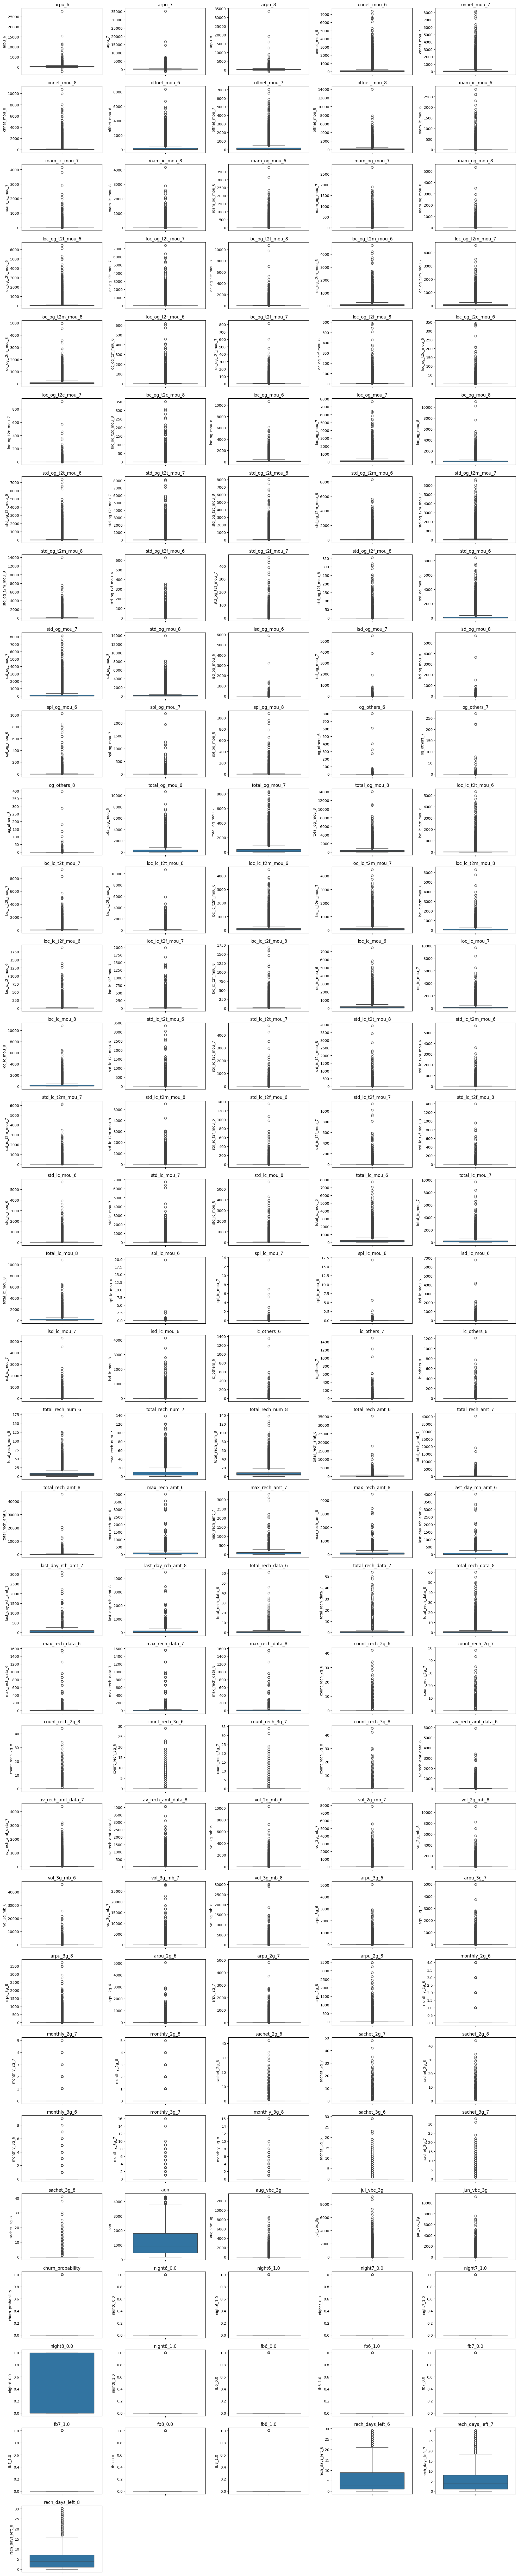

In [72]:

# Box plots for outlier detection
plt.figure(figsize=(20, 15))
num_cols = len(numeric_cols)
num_rows = (num_cols + 4)
plt.figure(figsize=(20, num_rows * 3))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 5, i + 1)
    sns.boxplot(y=telecom[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [73]:
telecom_data['night6_0.0']

0        False
1        False
2        False
3        False
4         True
         ...  
69994    False
69995    False
69996    False
69997     True
69998     True
Name: night6_0.0, Length: 69999, dtype: bool

In [74]:
#check for duplicate columns and remove one if its the same
telecom_data = telecom_data.loc[:, ~telecom_data.columns.duplicated(keep='first')]

In [75]:
telecom_data.shape

(69999, 162)

In [77]:
#confirming that all numeric columns indeed contain numeric values
numeric_cols = telecom_data.select_dtypes(include=['number']).columns

for col in numeric_cols:
  if not pd.api.types.is_numeric_dtype(telecom_data[col]):
    print(f"Column '{col}' contains non-numeric values.")

In [78]:
# Removing outliers below 5th and above 95th percentile
for col in numeric_cols:
    Q1 = telecom_data[col].quantile(0.05)
    Q3 = telecom_data[col].quantile(0.95)
    IQR = Q3 - Q1

    telecom_new = telecom_data[~((telecom_data[col] < (Q1 - 1.5 * IQR)) |(telecom_data[col] > (Q3 + 1.5 * IQR)))]
  #  q3 = telecom[col].quantile(0.90)
    # Assigning the filtered dataset
   # telecom_new = telecom[(telecom[col] > q1) & (telecom[col] < q3)]

telecom_new.shape

(69999, 162)

In [81]:
#we can also drop id column as it is unique and wont contribute to our model
telecom_new = telecom_new.drop('id',axis=1)
telecom_new.shape
telecom_new.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   31.277   87.009    7.527        48.58       124.38         1.29   
1    0.000  122.787   42.953         0.00         0.00         0.00   
2   60.806  103.176    0.000         0.53        15.93         0.00   
3  156.362  205.260  111.095         7.26        16.01         0.00   
4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               0.0   

   std_og_mou_6  

**Driving new features**

We have data pertaining to three months, june, july and august. We can try to derive new features by trying to summarize the time spent on calls overall, by the amount recharged overall , total data recharged by customer, identifying what the good phases and bad phases are

In [82]:
#Let us summarise according to each month the number of incoming, outgoing calls, amount recharged

#Columns with 'Data' information

data_cols = telecom_new.columns[telecom_new.columns.str.contains('data')]
print(data_cols)

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')


In [84]:
telecom_new[data_cols].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       69999.000000       69999.000000       69999.000000   
mean            0.619309           0.683981           0.697867   
std             1.762010           1.943193           1.973434   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       max_rech_data_6  max_rech_data_7  max_rech_data_8  av_rech_amt_data_6  \
count     69999.000000     69999.000000     69999.000000        69999.000000   
mean         31.748339        32.260075        32.986614           48.395787   
std          77.519536        78.069163        78.808337          126.923180   
min           0.000000         0.000000         0.000000            0.000000   
25%           0.000000         0.000000         0.000000            0.000000   
50%           0.000000         0.000000         0.000000            0.000000   
75%           8.000000        14.000000        17.000000            8.000000   
max        1555.000000      1555.000000      1555.000000         5920.000000   

       av_rech_amt_data_7  av_rech_amt_data_8  
count        69999.000000        69999.000000  
mean            51.415168           51.782975  
std            133.246541          131.291162  
min              0.000000            0.000000  
25%              0.000000            0.000000  
50%              0.000000            0.000000  
75%             17.000000           23.000000  
max           4365.000000         4076.000000

In [85]:
#We notice that the mean doesnt become 0. But it is also not evenly distributed
telecom_new['total_rech_data_amt_6'] = telecom_new['total_rech_data_6'] * telecom_new['av_rech_amt_data_6']
telecom_new['total_rech_data_amt_7'] = telecom_new['total_rech_data_7'] * telecom_new['av_rech_amt_data_7']
telecom_new['total_rech_data_amt_8'] = telecom_new['total_rech_data_8'] * telecom_new['av_rech_amt_data_8']


In [86]:
#Let us check the total recharge amounts without considering data recharge now
recharge_cols = telecom_new.columns[telecom_new.columns.str.contains('_rech_')]
print(recharge_cols)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'total_rech_data_amt_6', 'total_rech_data_amt_7',
       'total_rech_data_amt_8'],
      dtype='object')


In [88]:
#Removing data cols from recharge cols

non_data_recharge_cols = recharge_cols.difference(data_cols)
non_data_recharge_cols

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_data_amt_6', 'total_rech_data_amt_7',
       'total_rech_data_amt_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8'],
      dtype='object')

In [90]:
telecom_new[non_data_recharge_cols].describe()

count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
count     69999.000000     69999.000000     69999.000000     69999.000000   
mean          0.468150         0.524807         0.530422         0.151159   
std           1.518888         1.674653         1.657194         0.692042   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max          42.000000        48.000000        44.000000        29.000000   

       count_rech_3g_7  count_rech_3g_8  max_rech_amt_6  max_rech_amt_7  \
count     69999.000000     69999.000000    69999.000000    69999.000000   
mean          0.159174         0.167445      104.569265      104.137573   
std           0.758303         0.798173      121.407701      120.782543   
min           0.000000         0.000000        0.000000        0.000000   
25%           0.000000         0.000000       30.000000       30.000000   
50%           0.000000         0.000000      110.000000      110.000000   
75%           0.000000         0.000000      120.000000      128.000000   
max          34.000000        45.000000     4010.000000     3299.000000   

       max_rech_amt_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
count    69999.000000      69999.000000      69999.000000      69999.000000   
mean       107.540351        328.139788        322.376363        323.846355   
std        124.396750        404.211068        411.070120        426.181405   
min          0.000000          0.000000          0.000000          0.000000   
25%         30.000000        110.000000        100.000000         90.000000   
50%         98.000000        229.000000        220.000000        225.000000   
75%        144.000000        438.000000        430.000000        436.000000   
max       4449.000000      35190.000000      40335.000000      45320.000000   

       total_rech_data_amt_6  total_rech_data_amt_7  total_rech_data_amt_8  \
count           69999.000000           69999.000000           69999.000000   
mean              148.479217             172.524819             174.246063   
std               749.012768             856.608088             950.062467   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 8.000000              17.000000              23.000000   
max             55296.000000           55080.000000           89106.500000   

       total_rech_num_6  total_rech_num_7  total_rech_num_8  
count      69999.000000      69999.000000      69999.000000  
mean           7.566522          7.706667          7.224932  
std            7.041452          7.050614          7.195597  
min            0.000000          0.000000          0.000000  
25%            3.000000          3.000000          3.000000  
50%            6.000000          6.000000          5.000000  
75%            9.000000         10.000000          9.000000  
max          170.000000        138.000000        138.000000

In [91]:
telecom_new['total_amt_6'] = telecom_new['total_rech_data_amt_6'] + telecom_new['total_rech_amt_6']
telecom_new['total_amt_7'] = telecom_new['total_rech_data_amt_7'] + telecom_new['total_rech_amt_7']
telecom_new['total_amt_8'] = telecom_new['total_rech_data_amt_8'] + telecom_new['total_rech_amt_8']

In [92]:
telecom_new.shape

(69999, 167)

In [95]:
telecom_new[['total_amt_6','total_amt_7','total_amt_8']].describe()

total_amt_6   total_amt_7   total_amt_8
count  69999.000000  69999.000000  69999.000000
mean     476.619005    494.901182    498.092418
std      914.825016   1024.531353   1116.042570
min        0.000000      0.000000      0.000000
25%      110.000000    110.000000    100.000000
50%      266.000000    259.000000    262.000000
75%      550.000000    550.000000    558.000000
max    57866.000000  56075.000000  95884.500000

In [96]:
# Dropping the columns as they are not so useful columns since we drived new ones already

drop_data_cols = ['av_rech_amt_data_6', 'av_rech_amt_data_7',
                  'av_rech_amt_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']
telecom_new.drop(drop_data_cols, axis=1, inplace=True)

In [97]:
telecom_new.shape

(69999, 161)

Do the same for test set as well

In [98]:
#Creating day columns instead of date columns
date_cols = telecom_new.columns[telecom_new.columns.str.contains('date')]
print(date_cols)

Index([], dtype='object')


In [100]:
# Create new days columns, instead of date
import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

# Calculate timedelta and then divide by timedelta representing one day to get days
telecom_new["rech_days_left_6"] = (last_date_of_month_6 - telecom_data.date_of_last_rech_6) / pd.Timedelta(days=1)
telecom_new["rech_days_left_7"] = (last_date_of_month_7 - telecom_data.date_of_last_rech_7) / pd.Timedelta(days=1)
telecom_new["rech_days_left_8"] = (last_date_of_month_8 - telecom_data.date_of_last_rech_8) / pd.Timedelta(days=1)

day_columns = ["rech_days_left_6", "rech_days_left_7", "rech_days_left_8"]
print(telecom_new[day_columns].info())

# Drop all old date columns: add dates columns to drop_column list
telecom_new.drop(date_cols, axis=1, inplace=True)

print('Number of columns droped here  = ', len(date_cols))
print('Dataframe Shape: ', telecom_new.shape)

AttributeError: 'DataFrame' object has no attribute 'date_of_last_rech_6'

In [101]:
# Missing Values Treatment: continue
# look at the COLUMN summary again
df = round(100*(telecom_new.isnull().sum()/len(telecom_new.index)), 2)
df[df > 0]

Series([], dtype: float64)

In [102]:
telecom_new[['rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']].describe()

rech_days_left_6  rech_days_left_7  rech_days_left_8
count      69999.000000      69999.000000      69999.000000
mean           5.779511          5.397434          5.362605
std            6.130029          5.760272          6.086372
min            0.000000          0.000000          0.000000
25%            1.000000          1.000000          1.000000
50%            3.000000          4.000000          4.000000
75%            9.000000          8.000000          7.000000
max           29.000000         30.000000         30.000000

In [105]:
print('Original Dataframe Shape: ', og_data.shape);
print("\nOriginal Dataframe Info: \n"); og_data.info();
print("\nOriginal Dataframe Nulls:", og_data.isnull().sum().sum());

print('Cleaned Dataframe Shape: ', telecom_new.shape);
print("\nCleaned Dataframe Info: \n"); telecom_new.info();
print("\nCleaned Dataframe Nulls:", telecom_new.isnull().sum().sum());

Original Dataframe Shape:  (69999, 172)

Original Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB

Original Dataframe Nulls: 1835086
Cleaned Dataframe Shape:  (69999, 161)

Cleaned Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 161 entries, arpu_6 to total_amt_8
dtypes: bool(12), float64(123), int64(26)
memory usage: 80.4 MB

Cleaned Dataframe Nulls: 0


**Checking churn percentage**


In [106]:
print(round(100*(telecom_new['churn_probability'].mean()),2))
churn  = telecom_new["churn_probability"].value_counts()
print(churn)
#0 for no churn
#1 for churn

10.19
churn_probability
0    62867
1     7132
Name: count, dtype: int64


**Standardising Data**


In [107]:
telecom = telecom_new.copy()

In [109]:
X = telecom.drop(columns=['churn_probability'], axis=1)
Y = telecom[['churn_probability']]

scaler = StandardScaler()
_columns = X.columns
X[_columns] = scaler.fit_transform(X)
X.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.753587 -0.555159 -0.771000    -0.268737    -0.014281    -0.408716   
1 -0.847171 -0.451263 -0.670336    -0.433352    -0.420322    -0.412946   
2 -0.665232 -0.508211 -0.792389    -0.431556    -0.368318    -0.412946   
3 -0.379318 -0.211770 -0.476708    -0.408751    -0.368057    -0.412946   
4 -0.126945 -0.435570 -0.503788    -0.361244    -0.404554    -0.392846   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     -0.507419     -0.291706     -0.577219      -0.166712      -0.122882   
1     -0.610455     -0.513659     -0.487535      -0.166712      -0.122882   
2     -0.437907     -0.337641     -0.584536      -0.166712      -0.122882   
3     -0.390704     -0.348850     -0.426804      -0.166712      -0.122882   
4     -0.428320     -0.475604     -0.554296       0.786712      -0.122882   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.127584      -0.189100       -0.16486      -0.147081   
1      -0.127584      -0.189100       -0.16486      -0.147081   
2      -0.127584      -0.189100       -0.16486      -0.147081   
3      -0.127584      -0.189100       -0.16486      -0.121176   
4      -0.127584       0.029207       -0.16486      -0.147081   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         -0.288861         -0.292072         -0.286703         -0.527142   
1         -0.303904         -0.292072         -0.288570         -0.560237   
2         -0.300329         -0.206676         -0.288570         -0.409404   
3         -0.256750         -0.266151         -0.288570         -0.323070   
4         -0.235366         -0.260295         -0.247688         -0.330390   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.469293         -0.558744         -0.274990         -0.272577   
1         -0.574906         -0.574248         -0.274990         -0.272577   
2         -0.574906         -0.574248         -0.274990         -0.272577   
3         -0.279334         -0.417014         -0.274990         -0.272577   
4         -0.444009         -0.543573          0.642111         -0.180268   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0         -0.273350         -0.192049         -0.168550         -0.211097   
1         -0.273350         -0.192049          2.665935          4.462066   
2         -0.273350          0.187965         -0.168550         -0.211097   
3         -0.273350         -0.192049         -0.168550          1.048571   
4          0.121547         -0.192049          1.099950         -0.211097   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0     -0.525667     -0.490882     -0.541619         -0.124120   
1     -0.555958     -0.556878     -0.552457         -0.309113   
2     -0.456838     -0.503472     -0.552457         -0.309113   
3     -0.375297     -0.355929     -0.454336         -0.308076   
4     -0.318978     -0.450149     -0.487015         -0.309113   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0          0.167241         -0.299563         -0.262354         -0.028200   
1         -0.307461         -0.303440         -0.336981         -0.334779   
2         -0.296240         -0.303440         -0.221796         -0.022724   
3         -0.261433         -0.303440         -0.275966         -0.236161   
4         -0.307461         -0.303440         -0.319667         -0.334779   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0         -0.325509         -0.135618          -0.12765         -0.133675   
1         -0.325509         -0.135618          -0.12765         -0.133675   
2         -0.325509         -0.135618          -0.12765         -0.133675   
3         -0.308056         -0.065417          -0.12765         -0.133675   
4         -0.325509         -0.135618          -0.12765         -0.133675   



Dividing into training and test sets

In [110]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [111]:
x_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
48645 -0.411929 -0.484089 -0.156645    -0.427219    -0.415262    -0.409339   
54979 -0.526712 -0.716084 -0.490702    -0.265823    -0.269534    -0.186839   
7134   1.311659  0.966918  0.781418     1.195819     1.378394     0.942155   
6361  -0.543382 -0.577010 -0.233742    -0.398010    -0.382323    -0.282809   
6647  -0.612864 -0.383663 -0.556427    -0.406549    -0.390452    -0.412946   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
48645     -0.541168     -0.519028     -0.536082      -0.073218      -0.122882   
54979     -0.527905     -0.533157     -0.465083      -0.105212      -0.122882   
7134       0.997830      1.206801      0.981762      -0.166712      -0.122882   
6361      -0.515664     -0.422479      0.055405      -0.166712      -0.122882   
6647      -0.229469     -0.068119     -0.244170      -0.166712      -0.122882   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
48645      -0.127584      -0.032413       -0.16486      -0.147081   
54979      -0.127584       0.010610       -0.16486      -0.147081   
7134       -0.127584      -0.189100       -0.16486      -0.147081   
6361       -0.127584      -0.189100       -0.16486      -0.147081   
6647       -0.127584      -0.189100       -0.16486      -0.147081   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
48645         -0.295404         -0.292072         -0.281234         -0.491858   
54979         -0.054912          0.011814          0.171336         -0.446314   
7134           1.349252          0.894326          0.960965          2.440976   
6361          -0.233544         -0.215492         -0.111237         -0.404899   
6647          -0.250544         -0.231874         -0.288570          0.166903   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
48645         -0.485622         -0.471577         -0.274990         -0.272577   
54979         -0.482001         -0.534124         -0.190852         -0.272577   
7134           2.647088          2.594458         -0.037109         -0.208036   
6361          -0.272618          0.201809         -0.274990         -0.272577   
6647           0.431449          0.136001         -0.274990          0.480153   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
48645         -0.273350          1.006593          -0.16855         -0.211097   
54979         -0.162211         -0.192049          -0.16855         -0.211097   
7134          -0.051861         -0.192049          -0.16855         -0.091875   
6361           0.167264         -0.192049          -0.16855         -0.211097   
6647          -0.273350         -0.192049          -0.16855         -0.211097   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
48645     -0.506921     -0.501086     -0.483818         -0.309113   
54979     -0.329759     -0.308736     -0.235172         -0.309113   
7134       2.372242      2.202017      2.214661          0.631943   
6361      -0.414116     -0.320051      0.065545         -0.309113   
6647      -0.056574      0.150929     -0.109230         -0.309113   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
48645         -0.301545         -0.303440         -0.336981         -0.294046   
54979         -0.307461         -0.303440         -0.319428         -0.322038   
7134           1.107178          0.563747         -0.275966         -0.022876   
6361          -0.307461         -0.253196         -0.317757         -0.300132   
6647          -0.307461         -0.303440         -0.336981         -0.334779   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
48645         -0.325509         -0.135618         -0.127650         -0.133675   
54979         -0.252853         -0.135618         -0.127650         -0.133675   
7134          -0.253460         

In [112]:
x_train.shape

(48999, 160)

Performing PCA

In [113]:
pca = PCA(random_state=100, svd_solver='randomized')
pca.fit_transform(x_train)

array([[ 1.76166382e+00, -6.31226068e+00, -2.79460047e+00, ...,
        -4.19728469e-14, -3.68589599e-15, -1.83479368e-14],
       [-2.41019698e+00,  2.62913922e-01,  2.89453353e+00, ...,
        -6.43916424e-15, -8.96641668e-15, -2.61282155e-14],
       [ 2.99322865e+00,  6.04504284e+00,  1.31429583e+00, ...,
         9.89193172e-15,  1.26300463e-14, -1.15679941e-14],
       ...,
       [-2.55247810e+00, -2.99569912e-01,  6.93890730e-01, ...,
        -9.89235340e-17,  5.90507497e-17,  1.55246626e-17],
       [ 4.38821299e+00, -5.91347579e+00, -3.00739545e-01, ...,
        -4.44971661e-17,  5.49844223e-17, -1.53160371e-16],
       [ 9.16146493e+00,  3.97063549e+00,  6.77911725e+00, ...,
         2.59464185e-16, -1.68984716e-16,  5.78640436e-17]])

In [114]:
pca.components_.round(4)

array([[ 0.1525,  0.1643,  0.1566, ...,  0.1516,  0.1548,  0.1394],
       [ 0.0946,  0.1031,  0.0964, ..., -0.0497, -0.0497, -0.0467],
       [-0.0485, -0.0678, -0.0611, ..., -0.0583, -0.0694, -0.0608],
       ...,
       [ 0.    , -0.    ,  0.    , ...,  0.414 ,  0.0849, -0.3268],
       [ 0.    ,  0.    , -0.    , ..., -0.02  , -0.1195, -0.0239],
       [-0.    ,  0.    , -0.    , ..., -0.0031,  0.0159,  0.0729]])

In [115]:
colnames = list(x_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(10)

PC1       PC2        Feature
0  0.152476  0.094562         arpu_6
1  0.164320  0.103073         arpu_7
2  0.156618  0.096400         arpu_8
3  0.062230  0.118527    onnet_mou_6
4  0.068505  0.130116    onnet_mou_7
5  0.065391  0.122239    onnet_mou_8
6  0.091314  0.139532   offnet_mou_6
7  0.097777  0.152277   offnet_mou_7
8  0.092524  0.139910   offnet_mou_8
9  0.018629  0.015660  roam_ic_mou_6

In [116]:
pca.explained_variance_ratio_.round(4)

array([0.1245, 0.0864, 0.0591, 0.0441, 0.0335, 0.0321, 0.0294, 0.0239,
       0.0232, 0.0206, 0.0205, 0.0194, 0.0189, 0.0174, 0.0163, 0.0157,
       0.0141, 0.0136, 0.0134, 0.0132, 0.0119, 0.0109, 0.0106, 0.0103,
       0.0099, 0.0098, 0.0096, 0.0094, 0.0093, 0.0081, 0.008 , 0.0075,
       0.0073, 0.0072, 0.007 , 0.0067, 0.0063, 0.0062, 0.0061, 0.0059,
       0.0059, 0.0058, 0.0056, 0.0056, 0.0053, 0.0052, 0.0051, 0.005 ,
       0.0047, 0.0047, 0.0045, 0.0044, 0.0043, 0.0042, 0.0041, 0.004 ,
       0.0039, 0.0037, 0.0037, 0.0034, 0.0034, 0.0034, 0.0032, 0.0031,
       0.0031, 0.003 , 0.0029, 0.0029, 0.0028, 0.0028, 0.0026, 0.0025,
       0.0025, 0.0024, 0.0023, 0.0022, 0.0022, 0.0021, 0.0021, 0.002 ,
       0.002 , 0.002 , 0.0019, 0.0019, 0.0019, 0.0018, 0.0017, 0.0017,
       0.0016, 0.0016, 0.0015, 0.0015, 0.0015, 0.0015, 0.0014, 0.0014,
       0.0013, 0.0013, 0.0012, 0.0012, 0.001 , 0.001 , 0.001 , 0.0009,
       0.0009, 0.0009, 0.0008, 0.0008, 0.0007, 0.0007, 0.0006, 0.0006,
      

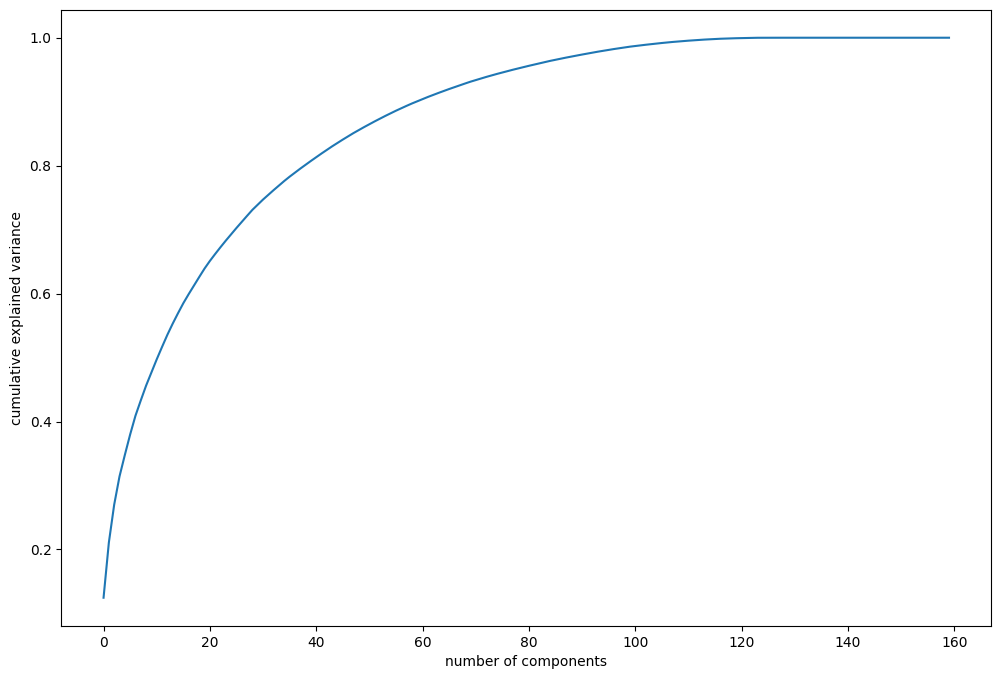

In [117]:
fig = plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We can go with 85 or 90 components to describe the 95% of the components

In [129]:
pca_final = IncrementalPCA(n_components=85)
df_train_pca = pca_final.fit_transform(x_train)
df_train_pca.shape

(48999, 85)

Checking Correlation :

<Axes: >

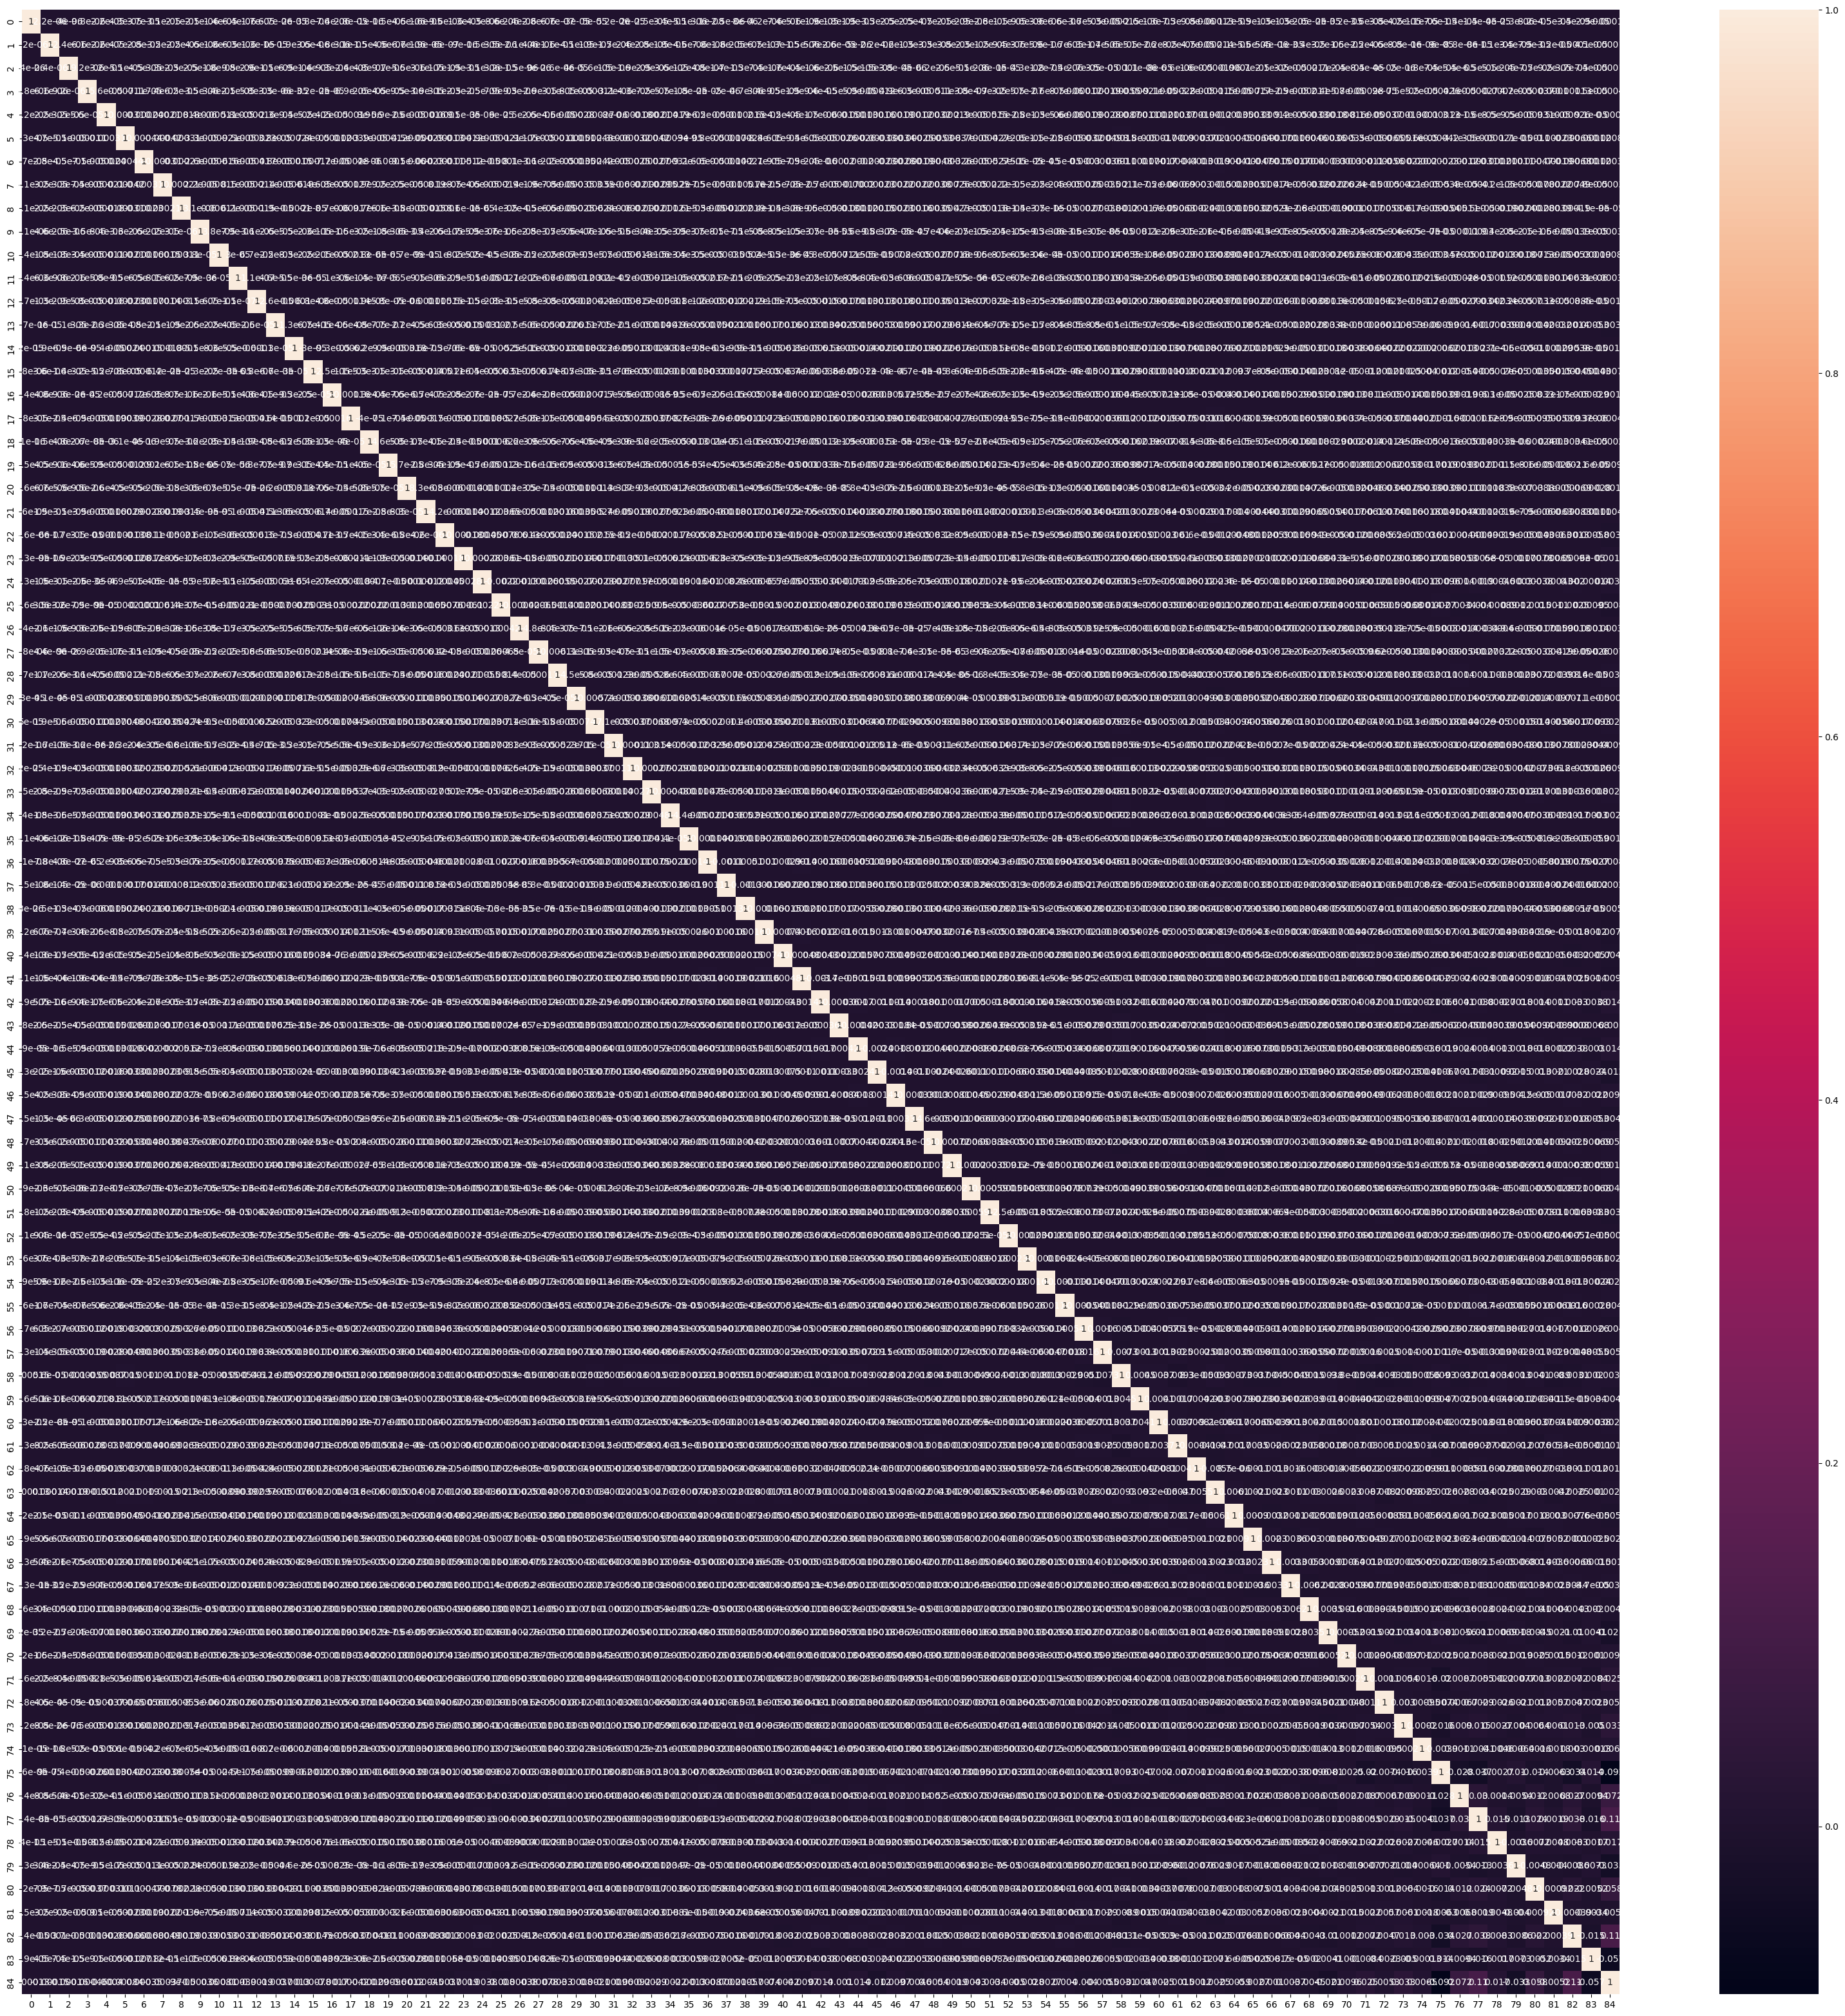

In [119]:
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=(40, 40))
sns.heatmap(corrmat, annot=True)

There is no correlation between the variables
Let us check the corr matrix to confirm again

In [130]:
df1_train_pca= pd.DataFrame(df_train_pca)
corrmat = df1_train_pca.corr()
print(corrmat)

              0             1             2             3         4   \
0   1.000000e+00  2.235051e-06 -4.008298e-06 -9.768467e-06 -0.000022   
1   2.235051e-06  1.000000e+00 -2.362987e-06 -6.090646e-06 -0.000022   
2  -4.008298e-06 -2.362987e-06  1.000000e+00  9.241786e-06  0.000032   
3  -9.768467e-06 -6.090646e-06  9.241786e-06  1.000000e+00  0.000056   
4  -2.198922e-05 -2.239777e-05  3.174877e-05  5.620475e-05  1.000000   
5   4.259948e-05  4.713190e-05 -5.106157e-05 -1.105518e-04 -0.000313   
6   3.701016e-05  2.776942e-05 -4.452477e-05 -7.123007e-05 -0.000239   
7  -3.126047e-05 -3.195617e-05  3.343429e-05  7.434476e-05  0.000212   
8  -2.127910e-05 -2.246798e-05  2.277081e-05  6.194425e-05  0.000177   
9  -2.078458e-06 -4.630852e-06  2.489509e-06 -3.484803e-06  0.000008   
10 -1.397534e-05 -1.847967e-05  1.769608e-05  3.367469e-05  0.000107   
11 -6.368607e-06 -6.297741e-06  9.821450e-06  2.140197e-05  0.000058   
12 -1.688956e-05 -1.295794e-05  2.870619e-05  5.773372e-05  0.00

#Let us transform the test data

In [123]:
pca_test_data = pca_final.transform(x_test)

In [124]:
pca_test_data.shape


(21000, 85)

# Generating Logistic Regression Model

In [131]:
logistic_regression = LogisticRegression()
logistic_model = logistic_regression.fit(df_train_pca, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
predicted_proba = logistic_model.predict_proba(pca_test_data)[:, 1]

In [133]:
"{:2.2}".format(metrics.roc_auc_score(y_test, predicted_proba))

'0.9'

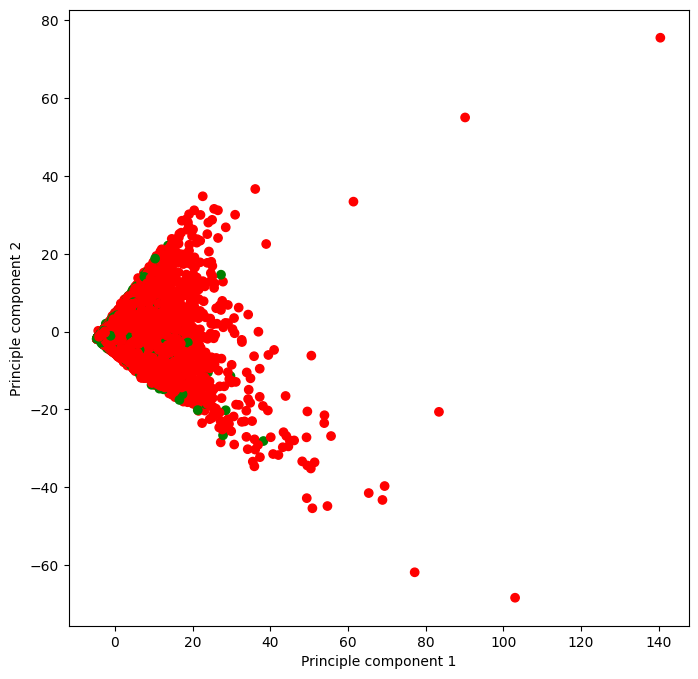

In [135]:
plt.figure(figsize=(8, 8))
plt.scatter(df_train_pca[:, 0], df_train_pca[:, 1], c= y_train['churn_probability'].map({0: 'red', 1: 'green'}))
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')

plt.show()

In [138]:
len(logistic_model.coef_[0])


85

In [139]:
len(colnames)

160

In [140]:
pca_column_frame = pcs_df.head(85)
pca_column_frame.head()

PC1       PC2      Feature
0  0.152476  0.094562       arpu_6
1  0.164320  0.103073       arpu_7
2  0.156618  0.096400       arpu_8
3  0.062230  0.118527  onnet_mou_6
4  0.068505  0.130116  onnet_mou_7

In [141]:
pca_column_frame['coeff'] = logistic_model.coef_[0]
pca_column_frame.sort_values(by=['coeff'])

<ipython-input-141-4b0297203697>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_column_frame['coeff'] = logistic_model.coef_[0]


PC1       PC2           Feature     coeff
36  0.019493  0.020366  std_og_t2f_mou_6 -0.683635
37  0.021521  0.021207  std_og_t2f_mou_7 -0.658938
2   0.156618  0.096400            arpu_8 -0.600153
44  0.045732  0.036610      isd_og_mou_8 -0.507361
45  0.022602  0.020195      spl_og_mou_6 -0.495439
0   0.152476  0.094562            arpu_6 -0.442466
63  0.074709  0.073351      loc_ic_mou_6 -0.431331
39  0.051102  0.125738      std_og_mou_6 -0.411483
35  0.045829  0.103278  std_og_t2m_mou_8 -0.396737
33  0.043690  0.101474  std_og_t2m_mou_6 -0.393351
64  0.081112  0.081169      loc_ic_mou_7 -0.369742
66  0.023955  0.031912  std_ic_t2t_mou_6 -0.365602
43  0.046947  0.037545      isd_og_mou_7 -0.355558
3   0.062230  0.118527       onnet_mou_6 -0.314597
1   0.164320  0.103073            arpu_7 -0.299142
53  0.099962  0.168419    total_og_mou_8 -0.261102
81  0.002066  0.012890      spl_ic_mou_6 -0.249398
38  0.020541  0.018349  std_og_t2f_mou_8 -0.249115
22  0.045188  0.032111  loc_og_t2f_mou_7 -0.229581
32  0.037959  0.096708  std_og_t2t_mou_8 -0.217223
24  0.014678  0.010225  loc_og_t2c_mou_6 -0.213868
7   0.097777  0.152277      offnet_mou_7 -0.208072
40  0.058995  0.141117      std_og_mou_7 -0.205636
25  0.011945  0.012659  loc_og_t2c_mou_7 -0.197098
72  0.016435  0.014376  std_ic_t2f_mou_6 -0.173996
58  0.076026  0.073526  loc_ic_t2m_mou_7 -0.169981
10  0.015095  0.008798     roam_ic_mou_7 -0.168598
21  0.043914  0.031663  loc_og_t2f_mou_6 -0.166455
60  0.031909  0.022525  loc_ic_t2f_mou_6 -0.150805
71  0.030443  0.039619  std_ic_t2m_mou_8 -0.132984
83 -0.012721  0.002049      spl_ic_mou_8 -0.132275
52  0.105863  0.182005    total_og_mou_7 -0.131454
73  0.018329  0.014822  std_ic_t2f_mou_7 -0.119498
46  0.019746  0.024374      spl_og_mou_7 -0.113206
11  0.018851  0.011496     roam_ic_mou_8 -0.096162
31  0.039585  0.102371  std_og_t2t_mou_7 -0.089323
29  0.099368  0.109670      loc_og_mou_8 -0.088786
78  0.080480  0.082054    total_ic_mou_6 -0.086157
79  0.086558  0.090450    total_ic_mou_7 -0.083602
6   0.091314  0.139532      offnet_mou_6 -0.077879
49  0.002789 -0.000723       og_others_7 -0.055328
4   0.068505  0.130116       onnet_mou_7 -0.051024
55  0.045516  0.050773  loc_ic_t2t_mou_7 -0.048428
23  0.045177  0.032115  loc_og_t2f_mou_8 -0.047518
54  0.042148  0.046324  loc_ic_t2t_mou_6 -0.046951
56  0.046373  0.050257  loc_ic_t2t_mou_8 -0.043701
68  0.024568  0.031256  std_ic_t2t_mou_8 -0.037758
20  0.093172  0.097123  loc_og_t2m_mou_8 -0.026478
15  0.061271  0.075989  loc_og_t2t_mou_6 -0.023646
47  0.023146  0.027058      spl_og_mou_8 -0.003033
30  0.034228  0.091145  std_og_t2t_mou_6  0.000033
82 -0.014186 -0.009103      spl_ic_mou_7  0.009906
27  0.095735  0.107734      loc_og_mou_6  0.010094
5   0.065391  0.122239       onnet_mou_8  0.010604
50  0.002922  0.002853       og_others_8  0.014835
80  0.085593  0.086829    total_ic_mou_8  0.017843
13  0.026662  0.023754     roam_og_mou_7  0.020018
41  0.055087  0.130863      std_og_mou_8  0.020345
77  0.037486  0.047379      std_ic_mou_8  0.034259
62  0.033613  0.022866  loc_ic_t2f_mou_8  0.040618
26  0.014890  0.013225  loc_og_t2c_mou_8  0.063548
67  0.024230  0.033408  std_ic_t2t_mou_7  0.065434
65  0.079920  0.077710      loc_ic_mou_8  0.086279
57  0.069711  0.066393  loc_ic_t2m_mou_6  0.104728
14  0.028150  0.024619     roam_og_mou_8  0.106309
8   0.092524  0.139910      offnet_mou_8  0.112584
48  0.006128  0.011621       og_others_6  0.117501
74  0.016096  0.013764  std_ic_t2f_mou_8  0.118540
28  0.103595  0.118314      loc_og_mou_7  0.131131
17  0.062386  0.076077  loc_og_t2t_mou_8  0.137848
16  0.065848  0.081787  loc_og_t2t_mou_7  0.143804
12  0.026232  0.029193     roam_og_mou_6  0.169329
76  0.036634  0.047953      std_ic_mou_7  0.169340
75  0.035236  0.045944      std_ic_mou_6  0.190459
51  0.097013  0.164711    total_og_mou_6  0.214549
61  0.032377  0.024414  loc_ic_t2f_mou_7  0.234247
84  0.016468  0.011585      isd_ic_mou_6  0.261116
59  0.073111  0.068996  loc_ic_

## Random forest classifier:

In [143]:
rfc = RandomForestClassifier(n_jobs=-1, bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=50,
                             min_samples_split=50,
                             max_features=8,
                             n_estimators=60)
rfc.fit(df_train_pca,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=4, max_features=8, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=60, n_jobs=-1)

In [144]:
predictions = rfc.predict(pca_test_data)

In [145]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     18901
           1       0.00      0.00      0.00      2099

    accuracy                           0.90     21000
   macro avg       0.45      0.50      0.47     21000
weighted avg       0.81      0.90      0.85     21000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [147]:
round(accuracy_score(y_true=y_test, y_pred=predictions),2)


0.9

In [148]:
print(confusion_matrix(y_test, predictions))

[[18901     0]
 [ 2099     0]]


In [149]:
predictions[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [150]:
y_test.head(10)


churn_probability
3425                   1
33067                  1
52420                  0
5220                   0
33958                  1
9315                   0
9796                   0
7084                   0
62263                  0
47921                  0

In [151]:
predicted_proba[:10].round(3)

array([0.535, 0.709, 0.405, 0.054, 0.286, 0.002, 0.   , 0.003, 0.055,
       0.807])

In [152]:
y_test.head(10)

churn_probability
3425                   1
33067                  1
52420                  0
5220                   0
33958                  1
9315                   0
9796                   0
7084                   0
62263                  0
47921                  0

In [153]:
print(confusion_matrix(y_test, predictions))

[[18901     0]
 [ 2099     0]]


In [154]:
metrics.roc_auc_score(y_test, predicted_proba)


0.8952701545443815

## Sampling

In [155]:
import imblearn

In [158]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_rus, y_run = rus.fit_resample(x_train, y_train)

In [159]:
x_rus.shape

(10066, 160)

In [160]:
y_run.sum()

churn_probability    5033
dtype: int64

Note: There may be a chance of loosing the data with under sampling